In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_excel('/content/Churn.xlsx')
data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


# **EDA**

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [ ]:
data.shape

(5000, 20)

In [ ]:
data.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [ ]:
data = data.replace('Nan',np.nan)

<ipython-input-6-fc4eeb1a5e07>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('Nan',np.nan)


In [ ]:
data.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


**To treat the missing values, we need to check the distribution of those columns.**

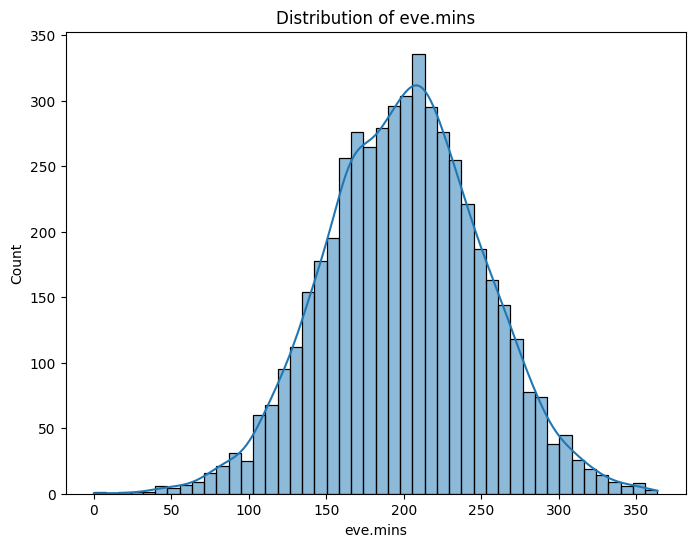

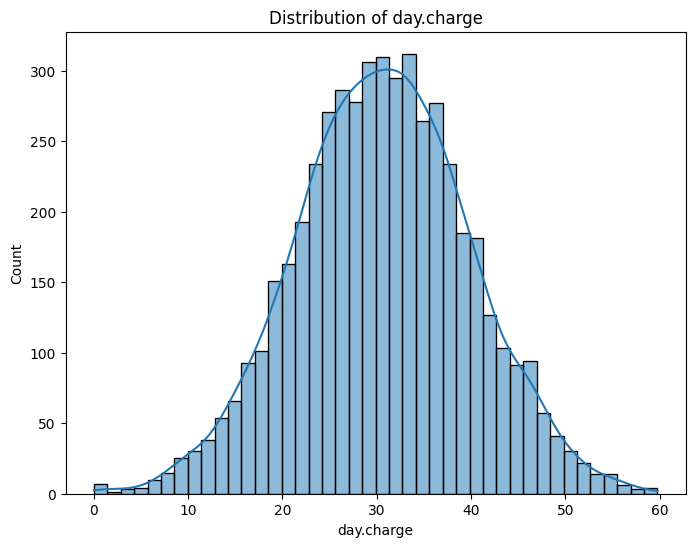

In [ ]:
# Check the distribution of 'eve.mins'
plt.figure(figsize=(8, 6))
sns.histplot(data['eve.mins'], kde=True)
plt.title('Distribution of eve.mins')
plt.show()

# Check the distribution of 'day.charge'
plt.figure(figsize=(8, 6))
sns.histplot(data['day.charge'], kde=True)
plt.title('Distribution of day.charge')
plt.show()

**Since data is normally distributed, we will replace the missing values with mean.**

In [ ]:
data['day.charge'].fillna(value = data['day.charge'].mean(),inplace=True)
data['eve.mins'].fillna(value = data['eve.mins'].mean(),inplace=True)

<ipython-input-9-e268287b2384>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['day.charge'].fillna(value = data['day.charge'].mean(),inplace=True)
<ipython-input-9-e268287b2384>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

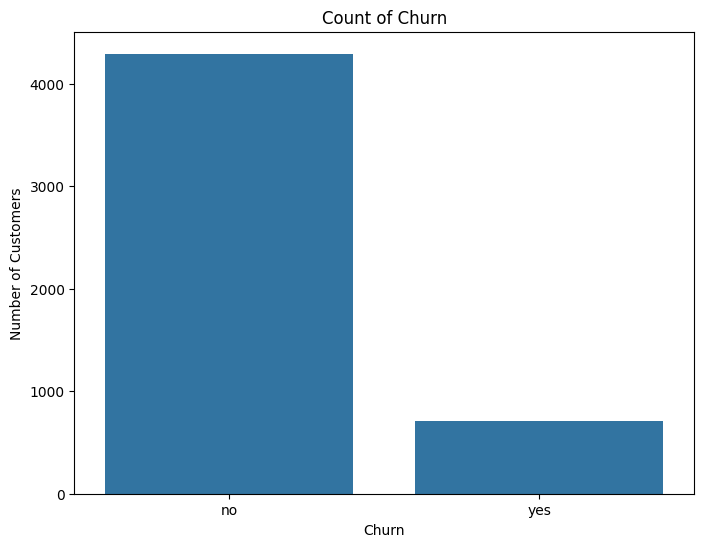

In [ ]:
# Countplot of Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=data)
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

### **RELATIONSHIP BETWEEN STATE AND CHURN PREDICTION**

In [ ]:
data['state'].nunique()

51

In [ ]:
data['state'].value_counts()

,count
state,
WV,158
MN,125
AL,124
ID,119
VA,118
OH,116
TX,116
WY,115
NY,114


### Converting states into broader regions (Northeast, Midwest, South, West)

* The original dataset contains a "state" column with 51 unique values (50 states + Washington D.C.).
* Keeping all 51 states as categorical features would increase dimensionality, making the model more complex and potentially harder to interpret.
*By grouping states into regions, we reduce the number of categories, which helps:
1. Simplify the model by lowering the feature dimensionality, which can improve model efficiency and prevent overfitting.
2. Capture regional patterns in churn behavior, as customers in the same region might exhibit similar tendencies due to shared factors (e.g., climate, economy, regional policies).
This approach maintains meaningful geographic information while reducing complexity.


In [ ]:
# Define state to region mapping
state_to_region = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Create a reverse mapping from state to region
region_mapping = {}
for region, states in state_to_region.items():
    for state in states:
        region_mapping[state] = region

# Map the states to regions
data['Region'] = data['state'].map(region_mapping)

data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,...,45.07,197.4,99,16.78,244.7,91,11.01,1,no,Midwest
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,...,27.47,195.5,103,16.62,254.4,103,11.45,1,no,Midwest
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,...,41.38,121.2,110,10.30,162.6,104,7.32,0,no,Northeast
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,...,50.90,61.9,88,5.26,196.9,89,8.86,2,no,Midwest
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,...,28.34,148.3,122,12.61,186.9,121,8.41,3,no,South


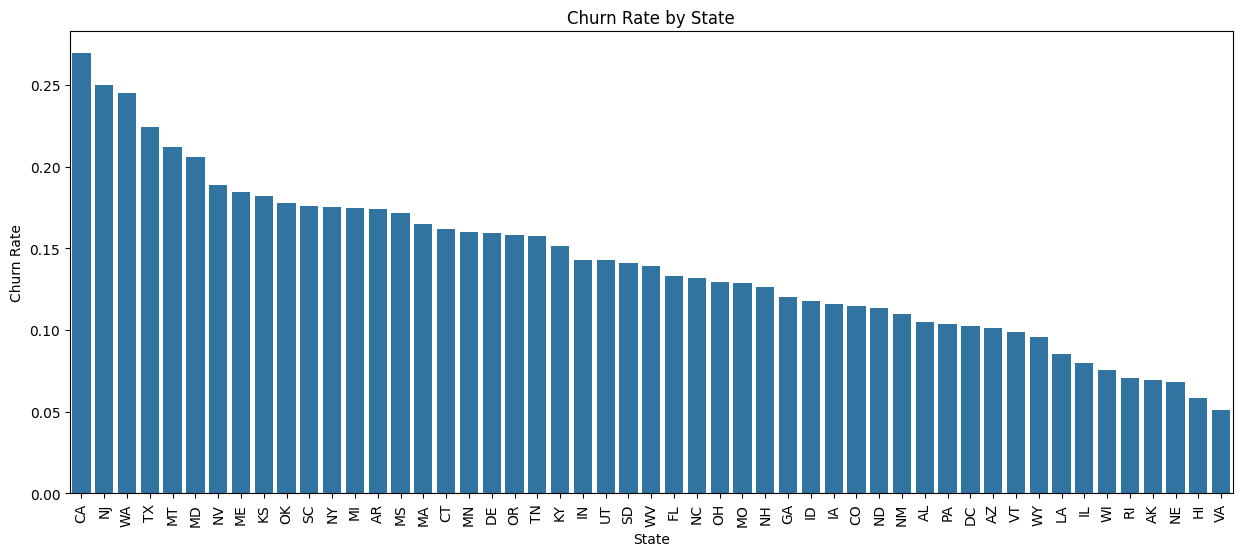

In [ ]:
# Convert 'churn' column to numeric (0 for 'no', 1 for 'yes')
data['churn'] = data['churn'].map({'no': 0, 'yes': 1})

# Group data by state and calculate the churn rate for each state
churn_rate_by_state = data.groupby('state')['churn'].mean()

# Sort the states by churn rate in descending order
churn_rate_by_state = churn_rate_by_state.sort_values(ascending=False)

# Create a bar plot of churn rate by state
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_state.index, y=churn_rate_by_state.values)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

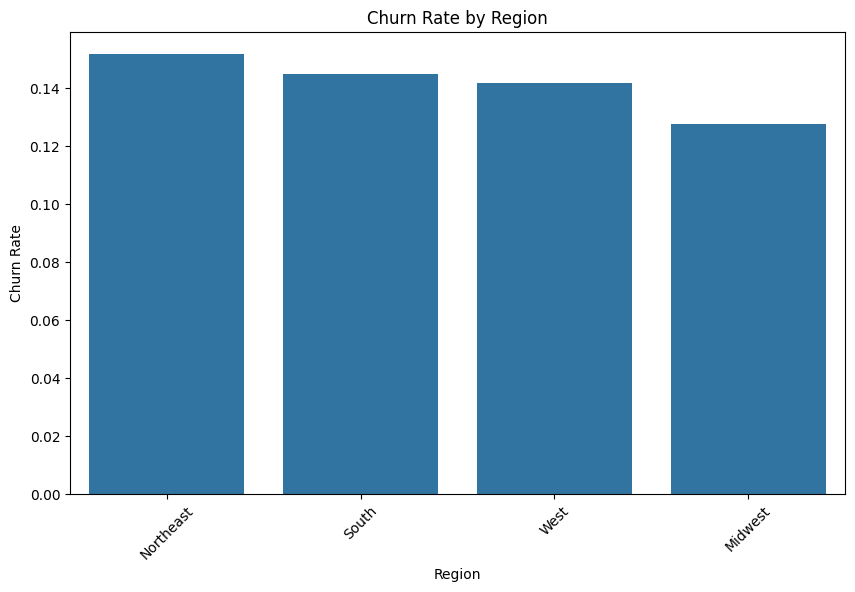

In [ ]:
# Group data by region and calculate the churn rate for each region
churn_rate_by_region = data.groupby('Region')['churn'].mean()

# Sort the regions by churn rate in descending order
churn_rate_by_region = churn_rate_by_region.sort_values(ascending=False)

# Create a bar plot of churn rate by region
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_region.index, y=churn_rate_by_region.values)
plt.xlabel('Region')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Dropping state column**

In [ ]:
data.drop(['state'], axis=1, inplace=True)
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,Midwest
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,Midwest
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,Northeast
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,Midwest
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,South


### **RELATIONSHIP BETWEEN AREA CODE AND CHURN PREDICTION**

In [ ]:
data['area.code'].value_counts()

,count
area.code,
area_code_415,2495
area_code_408,1259
area_code_510,1246


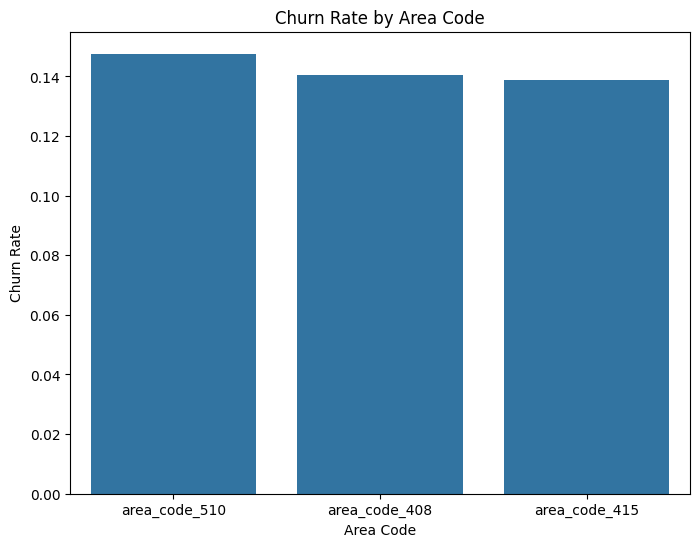

In [ ]:
# Group data by area code and calculate the churn rate for each area code
churn_rate_by_area_code = data.groupby('area.code')['churn'].mean()

# Sort the area codes by churn rate in descending order
churn_rate_by_area_code = churn_rate_by_area_code.sort_values(ascending=False)

# Create a bar plot of churn rate by area code
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_area_code.index, y=churn_rate_by_area_code.values)
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Area Code')
plt.show()

### **VOICE PLAN**

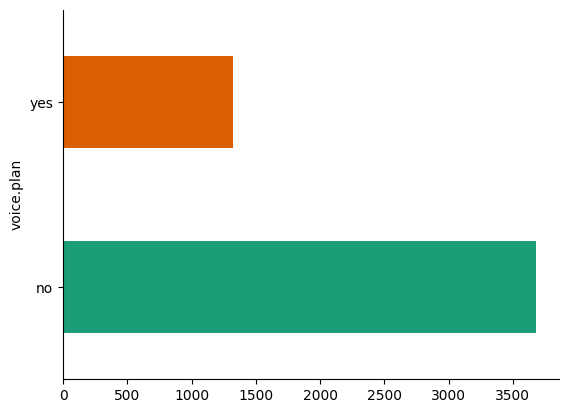

In [ ]:
data.groupby('voice.plan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Most of the customers don't have voice plan**

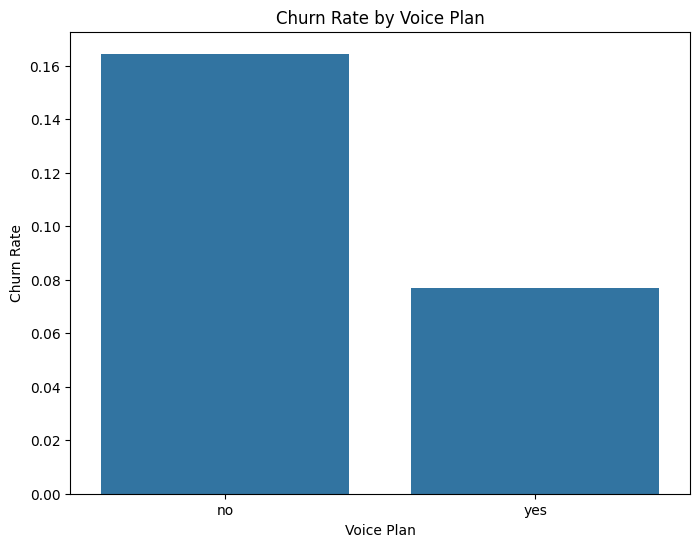

In [ ]:
# Group data by voice plan and calculate the churn rate for each voice plan
churn_rate_by_voice_plan = data.groupby('voice.plan')['churn'].mean()

# Sort the voice plans by churn rate in descending order
churn_rate_by_voice_plan = churn_rate_by_voice_plan.sort_values(ascending=False)

# Create a bar plot of churn rate by voice plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_voice_plan.index, y=churn_rate_by_voice_plan.values)
plt.xlabel('Voice Plan')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Voice Plan')
plt.show()

### **VOICE MESSAGE**

**Customers who don't have voice plans have higher chances of churning.**

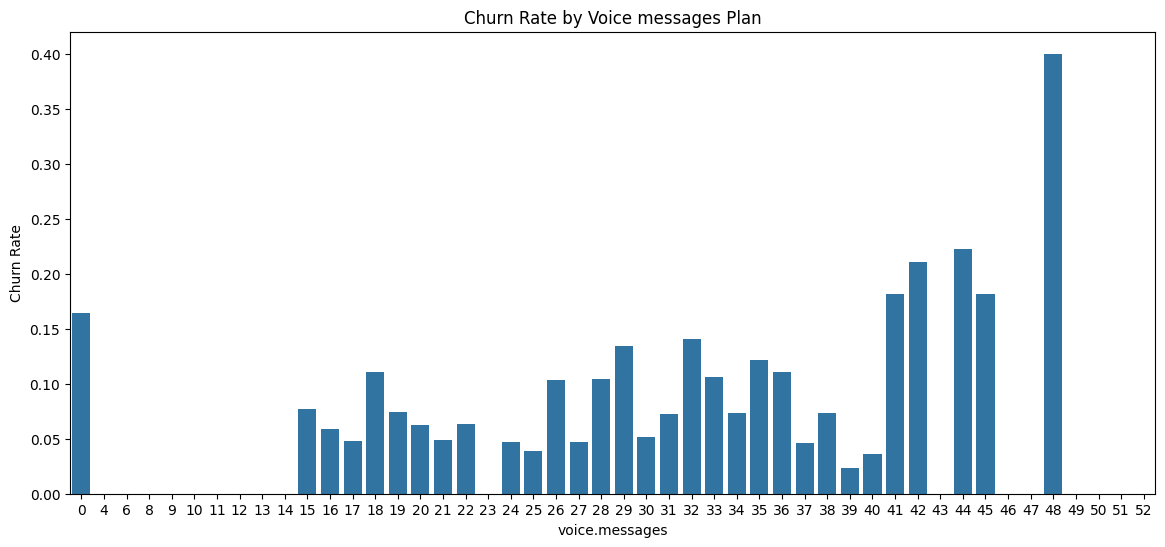

In [ ]:
# Group data by voice mail plan and calculate the churn rate for each voice mail plan
churn_rate_by_voice_mail_plan = data.groupby('voice.messages')['churn'].mean()

# Sort the voice mail plans by churn rate in descending order
churn_rate_by_voice_mail_plan = churn_rate_by_voice_mail_plan.sort_values(ascending=False)

# Create a bar plot of churn rate by voice mail plan
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_voice_mail_plan.index, y=churn_rate_by_voice_mail_plan.values)
plt.xlabel('voice.messages')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Voice messages Plan')
plt.show()


* **Churn at Zero Usage:** The bar for 0 voice messages has a relatively high churn rate. This means that customers who don’t use voice messages at all are more likely to leave the service compared to those who use it even a little. This could suggest that these customers may not be finding enough value in the service or may be using alternatives.

* **Churn at Very High Usage:** Towards the right side of the chart, there’s a significant spike in churn rate for customers who use 50 or more voice messages. This suggests that customers with very high voice message usage are also more likely to leave. These users may have specific needs not being met or may be experiencing issues (like cost or service quality) that make them dissatisfied, prompting them to consider other providers.

### **CUSTOMER CALLS**

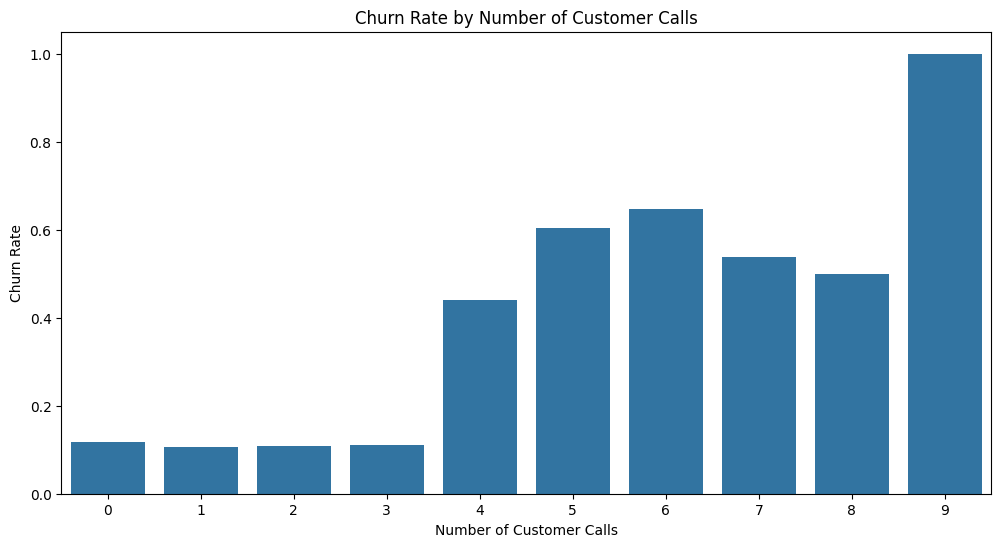

In [ ]:
# Group data by 'customer.calls' and calculate the churn rate for each call count
churn_rate_by_calls = data.groupby('customer.calls')['churn'].mean()

# Sort the call counts by churn rate in descending order
churn_rate_by_calls = churn_rate_by_calls.sort_values(ascending=False)

# Create a bar plot of churn rate by number of customer calls
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_calls.index, y=churn_rate_by_calls.values)
plt.xlabel('Number of Customer Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Customer Calls')
plt.show()


**1. Low Churn with Few Calls:** For customers who made 0 to 3 calls, the churn rate is relatively low and fairly consistent. This suggests that customers with fewer customer service interactions are less likely to churn, possibly because they are not experiencing significant issues with the service.

**2. Increasing Churn with More Calls:** Starting at around 4 customer service calls, there is a noticeable increase in churn rate. This trend continues, with the churn rate climbing as the number of calls increases. This indicates that customers who need to reach out to customer service more frequently are more likely to leave the service, possibly due to unresolved issues or dissatisfaction with the support they received.

**3. Extremely High Churn with 9 Calls:** For customers who made 9 calls, the churn rate is nearly 100%. This strong spike suggests that customers who require this many interactions with customer service are highly likely to churn, which may indicate severe dissatisfaction or unresolved problems that drive them to leave.

In [ ]:
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,Midwest
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,Midwest
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,Northeast
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,Midwest
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,South


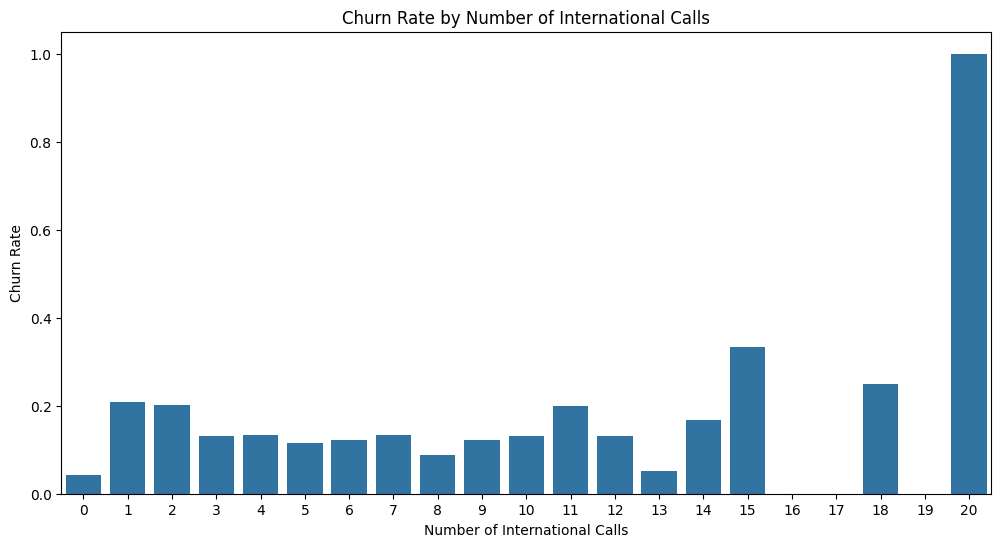

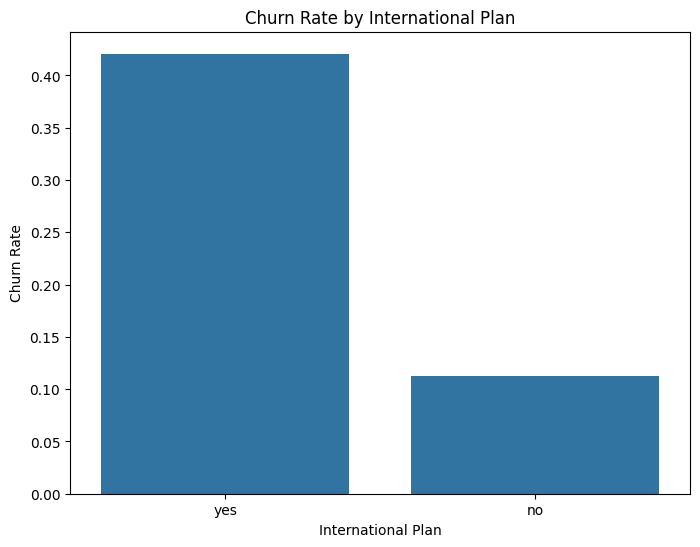

In [ ]:
# Analyze the relationship between international calls and churn
churn_rate_by_intl_calls = data.groupby('intl.calls')['churn'].mean()

# Sort the international call counts by churn rate in descending order
churn_rate_by_intl_calls = churn_rate_by_intl_calls.sort_values(ascending=False)

# Create a bar plot of churn rate by number of international calls
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_intl_calls.index, y=churn_rate_by_intl_calls.values)
plt.xlabel('Number of International Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of International Calls')
plt.show()

# Analyze the relationship between international plan and churn
churn_rate_by_intl_plan = data.groupby('intl.plan')['churn'].mean()

# Sort the international plans by churn rate in descending order
churn_rate_by_intl_plan = churn_rate_by_intl_plan.sort_values(ascending=False)

# Create a bar plot of churn rate by international plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x=churn_rate_by_intl_plan.index, y=churn_rate_by_intl_plan.values)
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by International Plan')
plt.show()

**1. Low Churn for Most International Call Counts:** For customers making 0 to 14 international calls, the churn rate is relatively low and remains under 0.25. This suggests that customers making a small to moderate number of international calls are not strongly linked to higher churn rates.

**2. Spike at 15 and 20 Calls:**

* There’s a noticeable increase in churn rate at ***15 international calls***, indicating that customers who make this many calls internationally are more likely to churn. This might reflect high usage of international services, potentially causing dissatisfaction due to high costs or poor service quality.
* For ***20 international calls***, the churn rate reaches nearly 100%. This dramatic increase suggests that customers who reach this high level of international calling are highly likely to churn, possibly because their needs aren’t being met or due to dissatisfaction with the service related to international calling.

**3. Minimal Impact at Intermediate Counts:** For the counts between 2 and 14, the churn rate stays relatively steady and low. This suggests that moderate usage of international calling does not significantly contribute to customer churn.

### **INTERNATIONAL CALLS AND CHARGES**

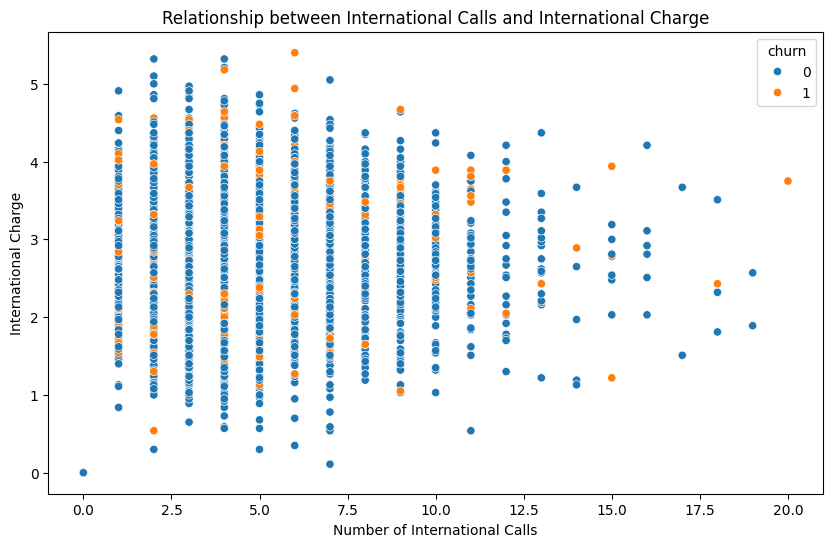

In [ ]:
# Analyze the relationship between international calls and international charge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='intl.calls', y='intl.charge', data=data, hue='churn')
plt.xlabel('Number of International Calls')
plt.ylabel('International Charge')
plt.title('Relationship between International Calls and International Charge')
plt.show()

# Calculate the correlation between international calls and international charge
correlation = data['intl.calls'].corr(data['intl.charge'])
print(f"Correlation between international calls and international charge: {correlation}")

**1. Linear Relationship Between Calls and Charges:** The points generally show a linear pattern where higher numbers of international calls correlate with higher international charges. This is expected, as more calls would lead to higher charges.



2.Churn Distribution Across Charges and Calls:

* **For lower numbers of international calls (0-10) and lower charges**, most customers did not churn (indicated by the predominance of blue dots).

* **At higher international charges and higher call counts**, there are more orange dots, indicating a higher churn rate. This suggests that customers who make frequent international calls and incur higher charges are more likely to churn.



**3. Notable Churn at Extremes:** There are some instances of churn even at the highest call counts (15-20), where nearly all customers are paying high charges. This suggests that extreme cases of international usage might lead to dissatisfaction, potentially due to high costs, driving customers to churn.

### DATA CLEANING

Correlation between international calls and international charge: 0.01690009340515218


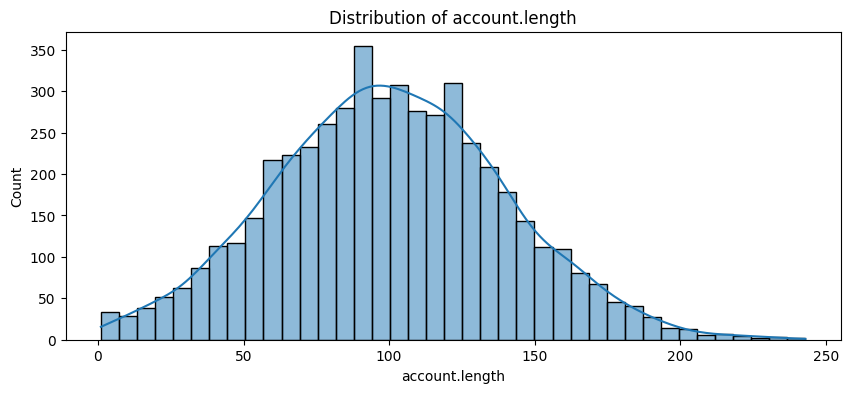

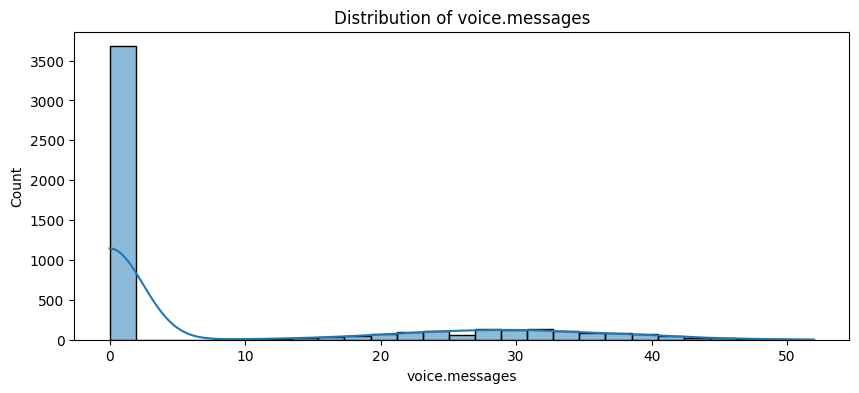

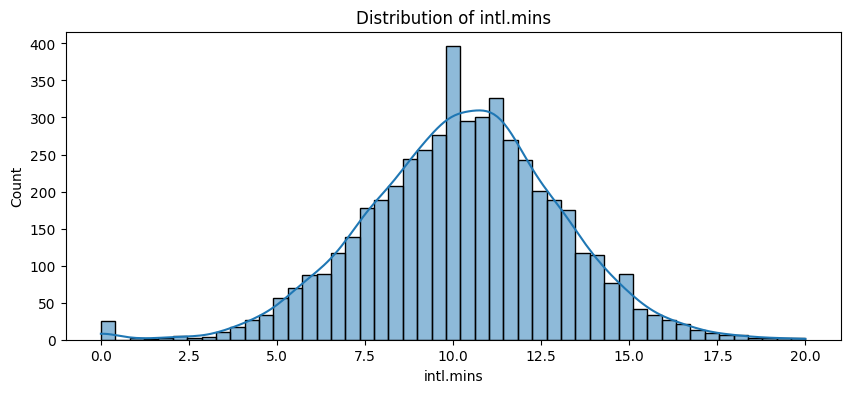

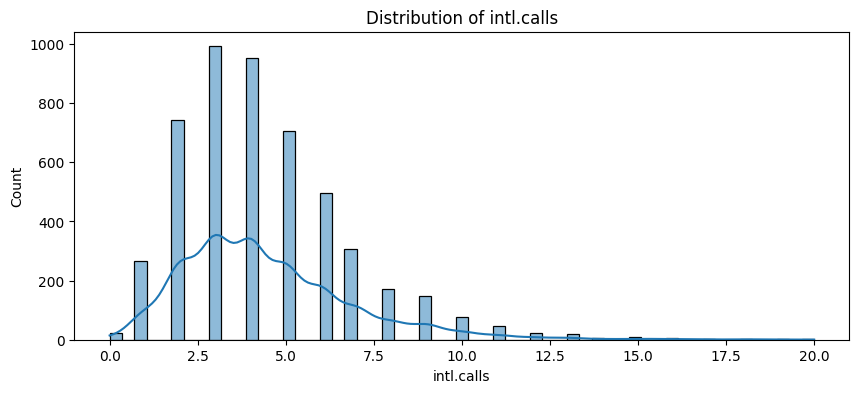

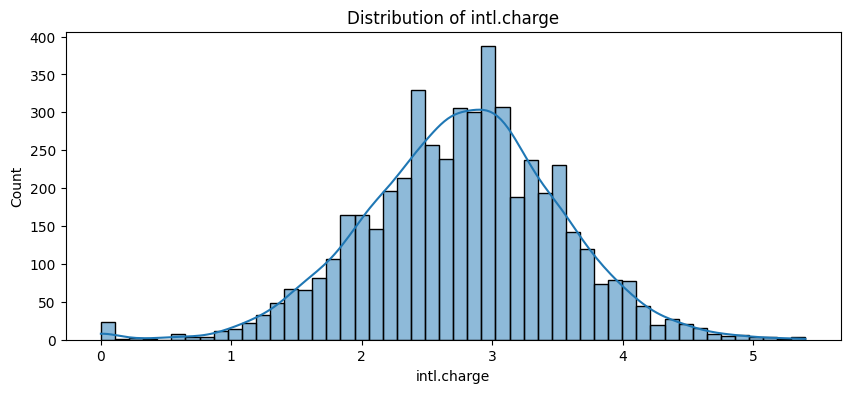

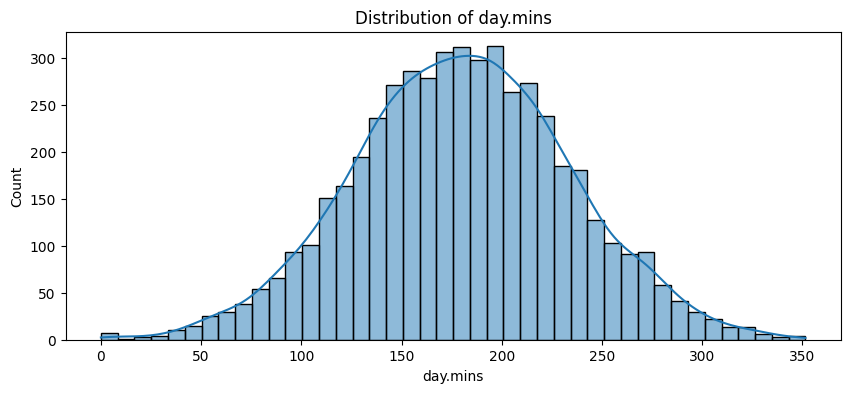

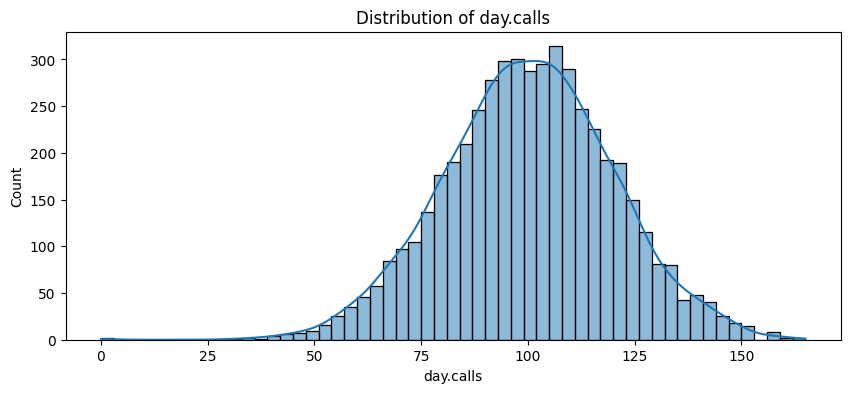

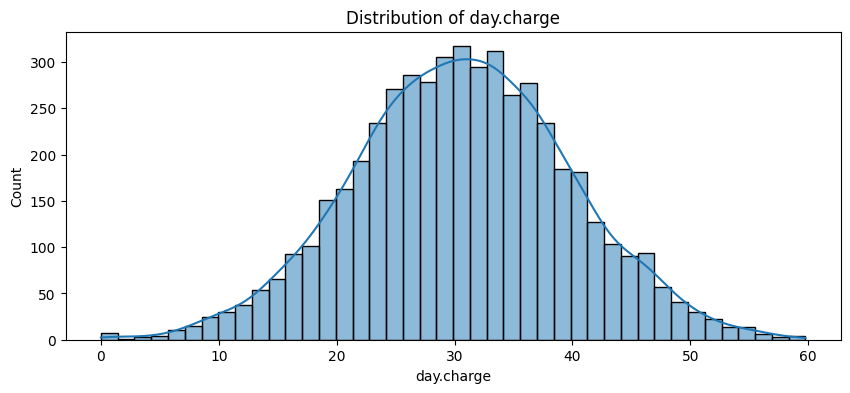

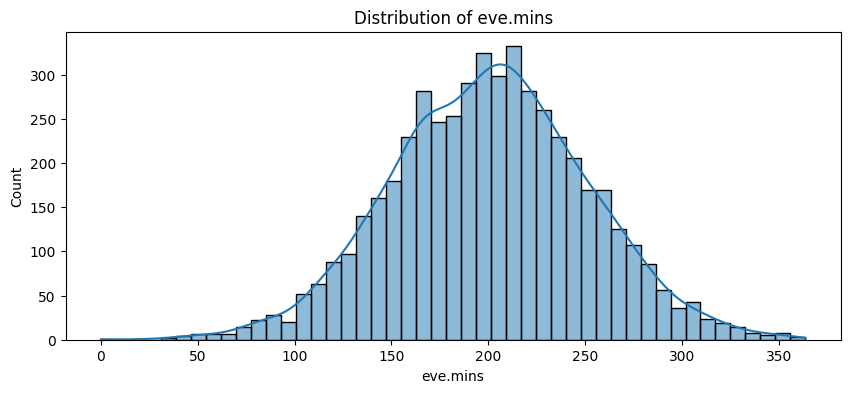

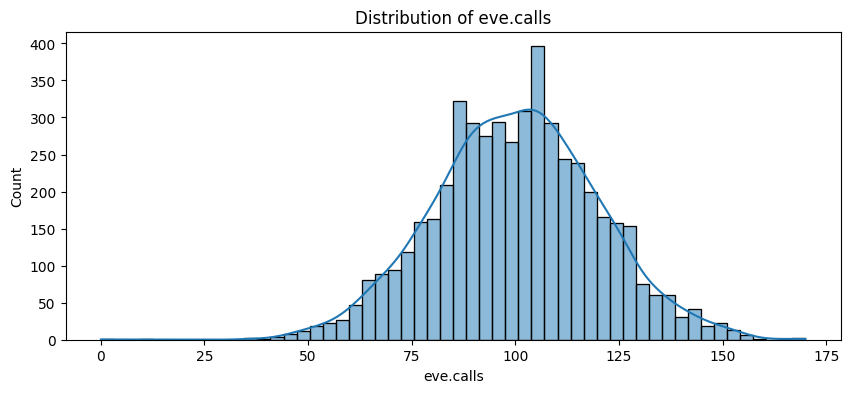

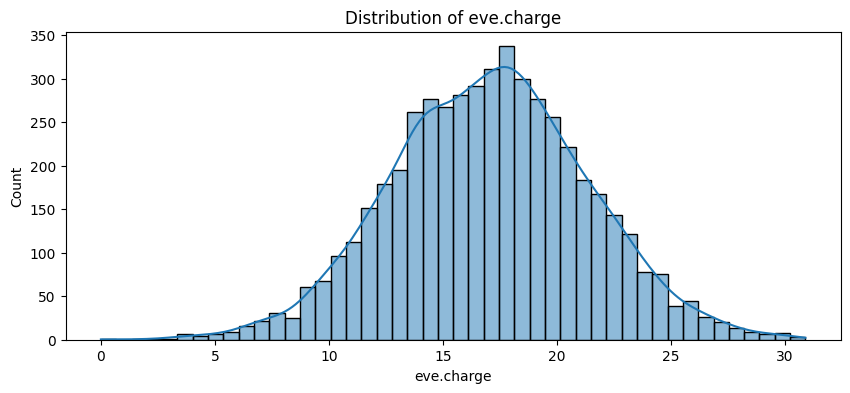

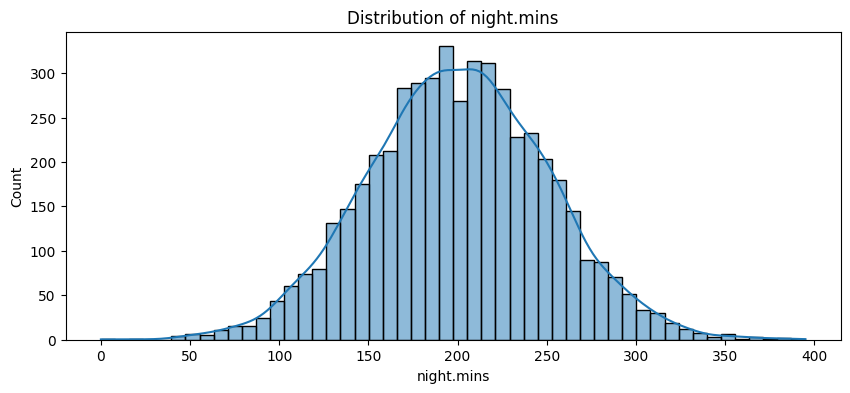

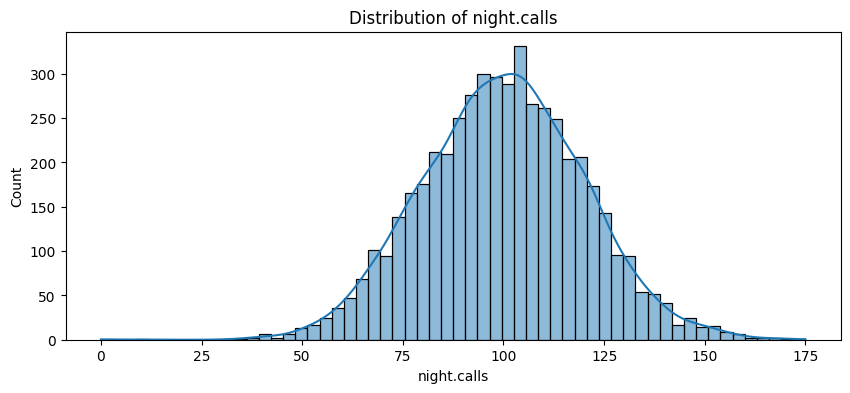

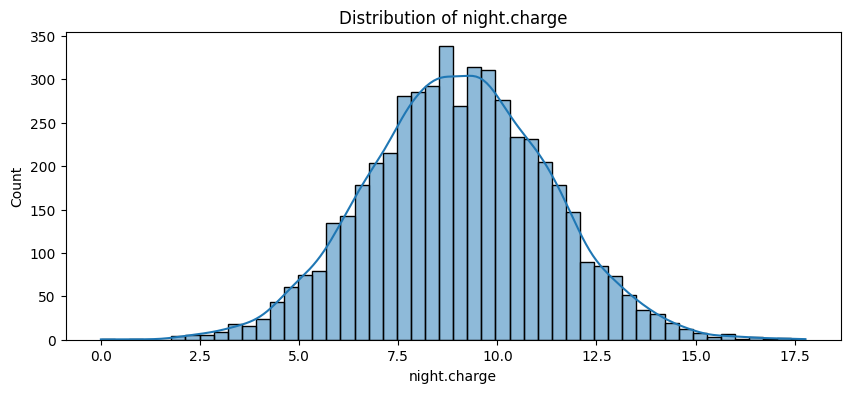

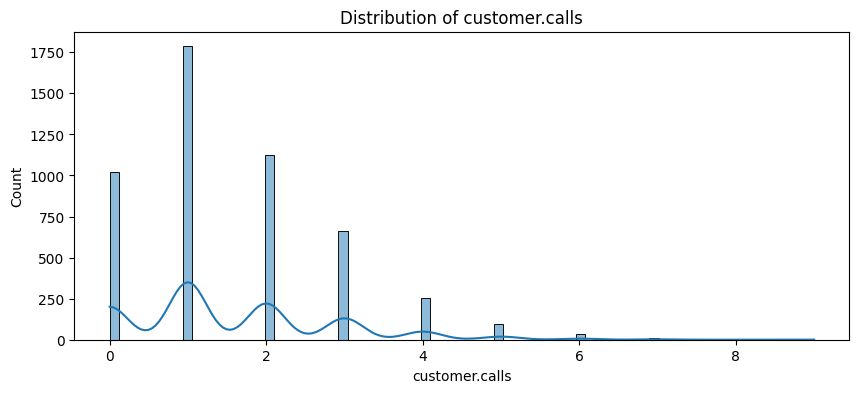

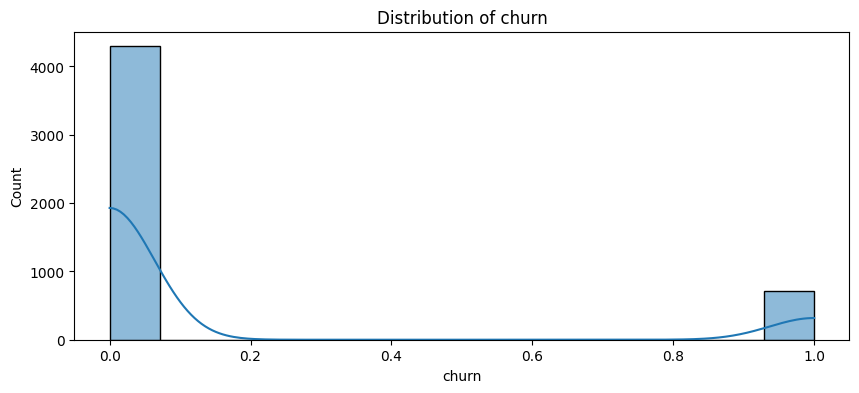

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<Axes: >

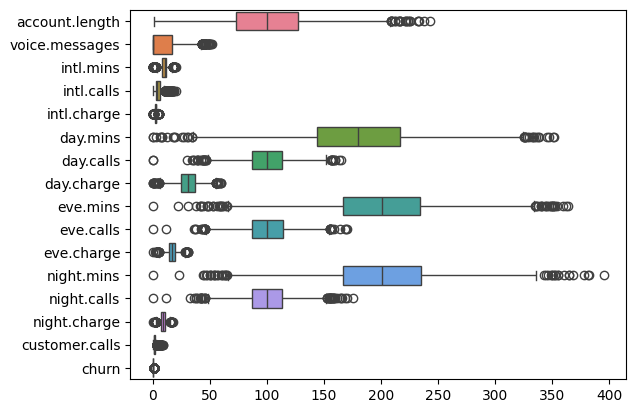

In [ ]:
sns.boxplot(data, orient='h')

# **MODEL BUILDING**

In [ ]:
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,Midwest
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,Midwest
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,Northeast
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,Midwest
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,South


In [ ]:
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,0
1,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,0
2,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,1
3,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0
4,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,2


In [ ]:
scaler = StandardScaler()
data[['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
   'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls','eve.charge',	'night.mins',
   'night.calls',	'night.charge' ]] = scaler.fit_transform(data[['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
   'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls','eve.charge',	'night.mins',
   'night.calls',	'night.charge']])

In [ ]:
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,1,0.698941,1,1.273145,0,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574022,-0.063067,-0.060077,-0.063849,0.876999,-0.446928,0.876286,1,0,0
1,1,0.169849,1,1.346973,0,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347581,-0.100744,0.141693,-0.101089,1.068992,0.154374,1.069818,1,0,0
2,1,0.925695,0,-0.572549,0,0.701969,0.229917,0.695971,1.171125,0.704546,1.171141,-1.574129,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0,0,1
3,0,-0.409634,0,-0.572549,1,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210553,-2.750061,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,2,0,0
4,1,-0.636388,0,-0.572549,1,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252593,-1.036730,1.100103,-1.034426,-0.267041,1.056327,-0.267307,3,0,2


In [ ]:
x = data.drop('churn', axis=1)
y = data['churn']

In [ ]:
pca = PCA()
pc = pca.fit_transform(data.drop('churn', axis=1))

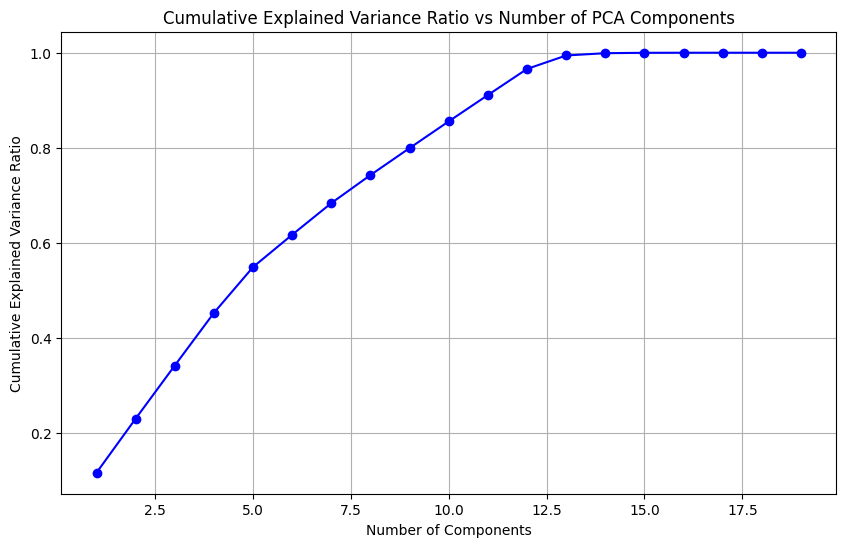

In [ ]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Select the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components explaining 95% of the variance: {n_components}')

Number of components explaining 95% of the variance: 12


In [ ]:
x_new = pc[:, 0:14]

##Model Building

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [ ]:
# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test, use_smote=False):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"{model.__class__.__name__} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

In [ ]:
# Initialize Models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier()
]

In [ ]:
# Evaluate Models Without and With SMOTE
print("Evaluating models without SMOTE:")
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

print("\nEvaluating models with SMOTE:")
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test, use_smote=True)

Evaluating models without SMOTE:
LogisticRegression - Train Accuracy: 0.87, Test Accuracy: 0.87
DecisionTreeClassifier - Train Accuracy: 1.00, Test Accuracy: 0.88
SVC - Train Accuracy: 0.94, Test Accuracy: 0.92
RandomForestClassifier - Train Accuracy: 1.00, Test Accuracy: 0.92
XGBClassifier - Train Accuracy: 1.00, Test Accuracy: 0.93

Evaluating models with SMOTE:
LogisticRegression - Train Accuracy: 0.78, Test Accuracy: 0.76
DecisionTreeClassifier - Train Accuracy: 1.00, Test Accuracy: 0.85
SVC - Train Accuracy: 0.94, Test Accuracy: 0.89
RandomForestClassifier - Train Accuracy: 1.00, Test Accuracy: 0.91
XGBClassifier - Train Accuracy: 1.00, Test Accuracy: 0.93
